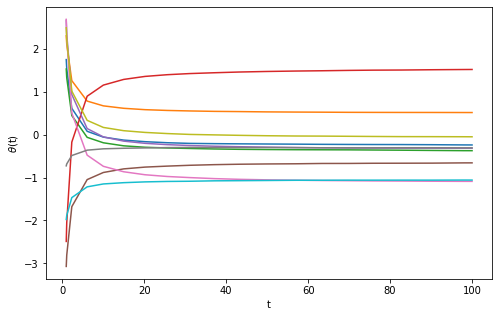

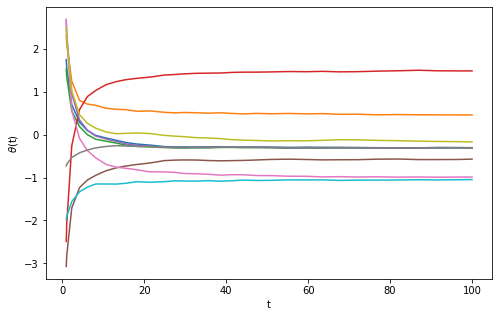

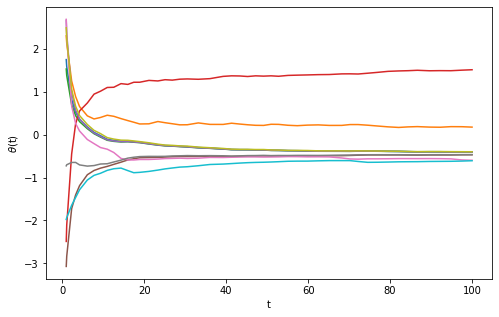

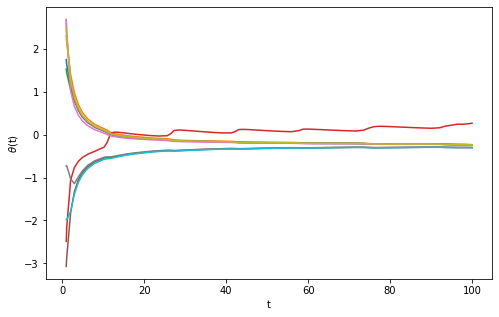

In [18]:
# Exercise 2

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint
import cmath

def fun(t,y,w,k):
    z = np.sum(np.exp(1j*y))/len(y)
    (r,phi) = cmath.polar(z)
    return w + k*r*np.sin(phi-y)  

N = 10
K = [0.1,0.5,1,2]
w0 = np.random.normal(size=N)
y0 = np.random.uniform(-np.pi,np.pi,N)

for k in K:
    sol = scint.solve_ivp(fun,t_span=[1,100],y0=y0,args=(w0,k))
    plt.figure(figsize=(8,5))
    for i in range(len(y0)):
        plt.plot(sol.t,sol.y[i,:]/sol.t)
    plt.xlabel("t")
    plt.ylabel(r"$\theta$(t)")

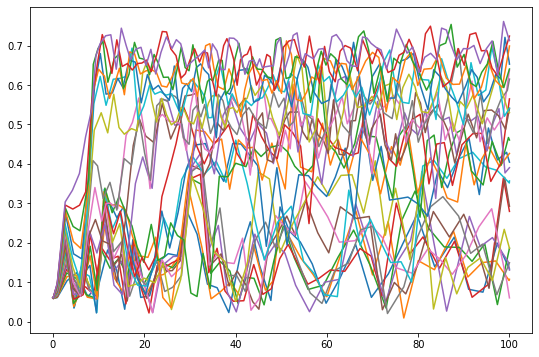

In [16]:
# Exercise 3

N = 100
w0 = np.random.normal(size=N)
w0 -= np.mean(w0)
y0 = np.random.uniform(-np.pi,np.pi,N)
K = np.linspace(1,2,25)

plt.figure(figsize=(9,6))
for k in K:
    sol = scint.solve_ivp(fun,t_span=[0,100],y0=y0,args=(w0[:],k))
    r = np.abs(np.sum(np.exp(1j*sol.y),axis=0)/N)
    plt.plot(sol.t,r)

In [73]:
# Exercise 4
# takes about 1 minute

Nrep = 100
N = 100
K = np.linspace(1,2,25)
r_bar = []

for k in K:
    r_mean = 0
    for n in range(Nrep):
        w0 = np.random.normal(size=N)
        w0 -= np.mean(w0)
        y0 = np.random.uniform(-np.pi,np.pi,N)
        sol = scint.solve_ivp(fun,t_span=[0,100],y0=y0,args=(w0[:],k))
        r = np.abs(np.sum(np.exp(1j*sol.y),axis=0)/N)
        r = sum(r[sol.t>50])/len(sol.t[sol.t>50])
        r_mean += r/Nrep    
    r_bar.append(r_mean)

Text(0, 0.5, 'r')

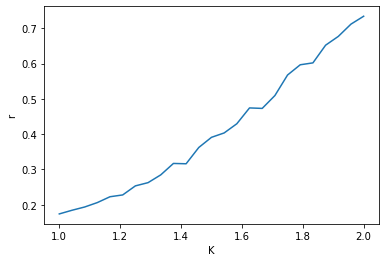

In [76]:
plt.plot(K,r_bar)  
plt.xlabel("K")
plt.ylabel("r")